# 2.1 - Visualización en Python


En Python podemos realizar visualizaciones de todo tipo. En esta clase veremos algunas herramientas que nos permitirán crear gráficos. Algunos ejemplos:


![cuadrados](images/cuadrados.png)


![julia](images/julia.png)


![mandelbrot](images/mandelbrot.png)

$$$$

Esto no es nuestro objetivo. 

En realidad, nuestros objetivos son dos, en primer lugar visualizar los datos para realizar un análisis exploratorio de los datos, EDA por las siglas en inglés. Necesitamos describir correctamente los datos y la visualización es una gran herramienta para ello. Nuestro segundo objetivo es representar los datos de tal manera que tengan narrativa, que podamos contar una historia a través de ellos. Es lo que se llama storytelling.

**¿Qué es storytelling?**

Es una técnica que utiliza datos para contar una historia. Es una forma útil de presentar información, lo que significa que se puede utilizar tanto con audiencias internas como externas. Si estás realizando la presentación de un informe, por ejemplo, puedes expresar mejor una idea o explicar mejor un punto si utilizas gráficos, tablas o infografías, ya que dichos contenidos retienen la atención de tu audiencia de una manera que un texto o incluso un video no lo pueden hacer. Estas herramientas facilitan el procesamiento de toda la información a la vez y la toma de decisiones.

El storytelling va más allá de representar datos de una manera más atractiva. Consiste en mostrar cómo o por qué los datos cambiaron durante un período, y para eso es necesario reunir:

+ una narrativa
+ un contexto
+ personajes

Estos son los factores clave para que tu audiencia se involucre realmente con el contenido.

$$$$

Comenzaremos repasando algunos gráficos de la clase anterior, para EDA.

**Matplotlib/Pylab - Seaborn**

In [1]:
import pandas as pd
import numpy as np

# pa pintar
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (8, 6)  # tamaño por defecto, decenas de pixeles



import seaborn as sns  # esta basada en matplotlib

%matplotlib inline

In [2]:
df = pd.read_csv('../data/video_games_sales.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Comenzamos con la descripción estadística de los datos:

In [3]:
df.describe(include='object').T

,count,unique,top,freq
Name,16717,11562,Need for Speed: Most Wanted,12
Platform,16719,31,PS2,2161
Genre,16717,12,Action,3370
Publisher,16665,581,Electronic Arts,1356
User_Score,10015,96,tbd,2425
Developer,10096,1696,Ubisoft,204
Rating,9950,8,E,3991


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 8.0 MB


**Count plot**

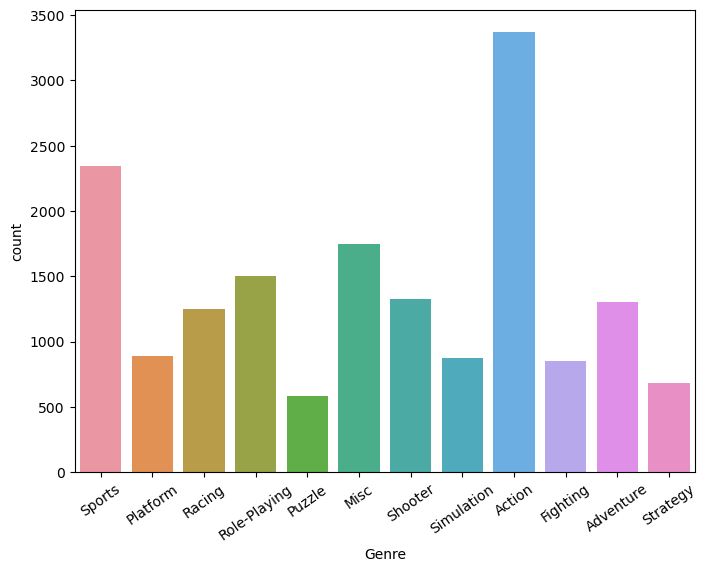

In [11]:
sns.countplot(x=df.Genre)

plt.xticks(rotation=35);   # rotacion de 35º de las etiquetas del eje x

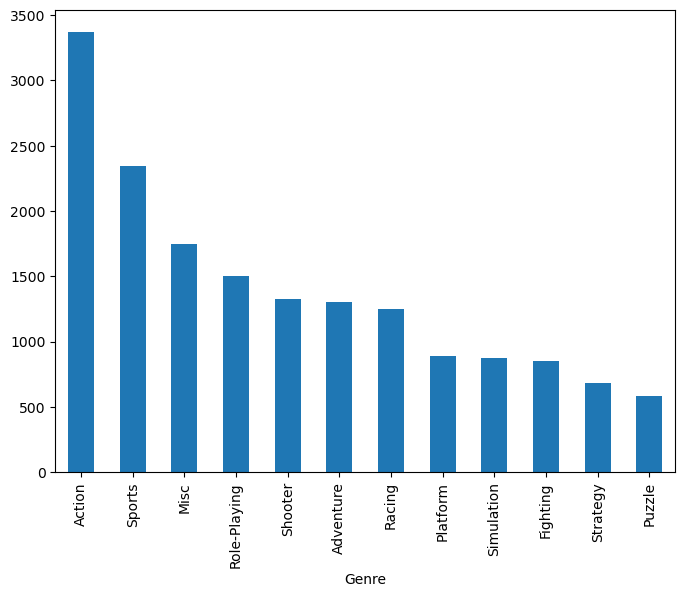

In [19]:
df.groupby('Genre').count().Name.sort_values(ascending=False).plot(kind='bar');

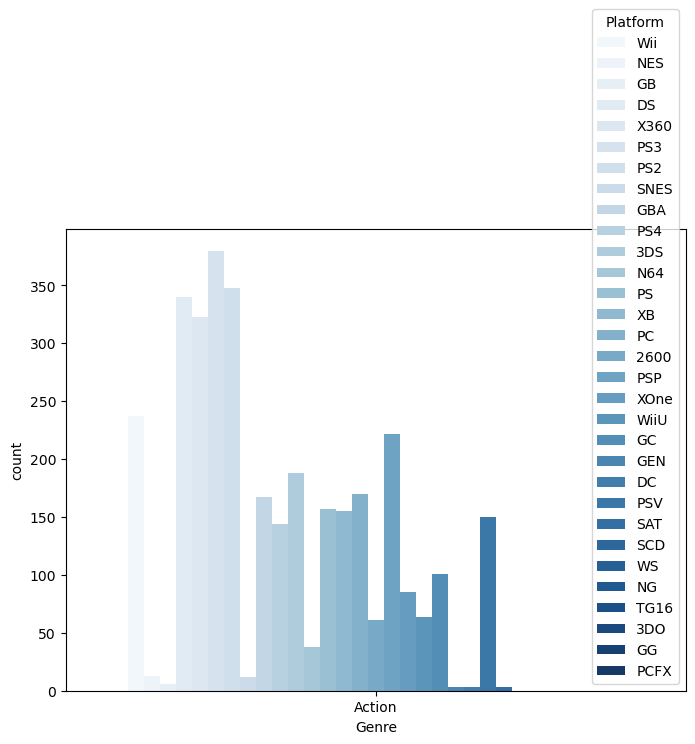

In [26]:
sns.countplot(x=df[df.Genre=='Action'].Genre,
              hue=df.Platform,
              palette='Blues');

**Histograma**

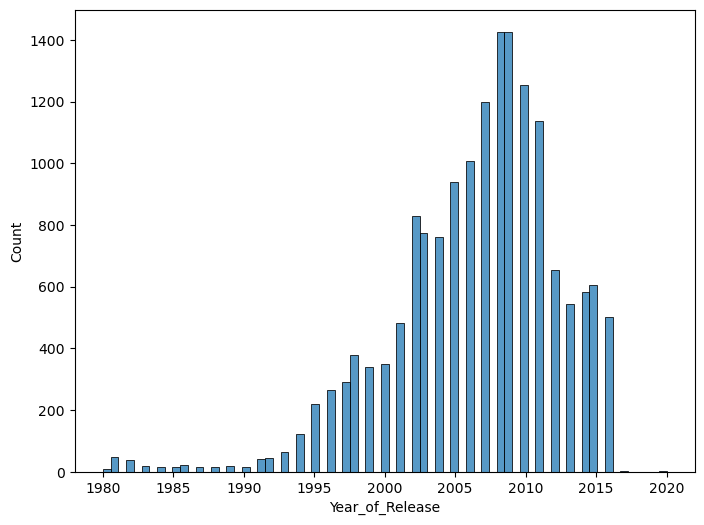

In [27]:
sns.histplot(x=df.Year_of_Release);

In [28]:
df.Year_of_Release.min(), df.Year_of_Release.max()

(1980.0, 2020.0)

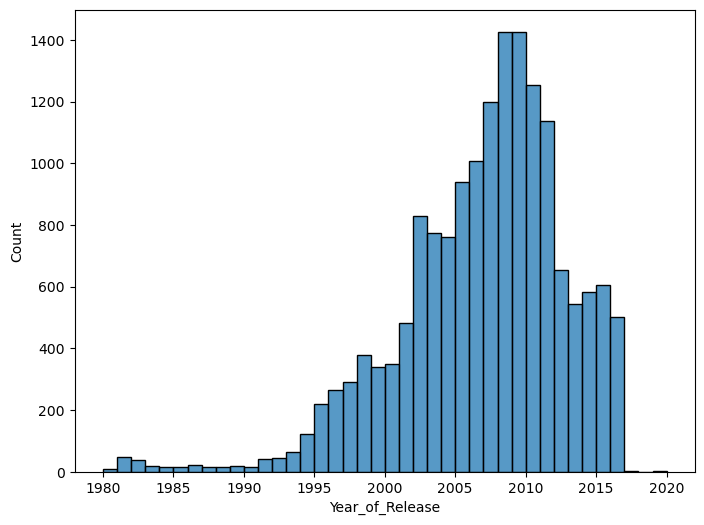

In [29]:
sns.histplot(x=df.Year_of_Release,
             bins=40     # nº de barras
            );

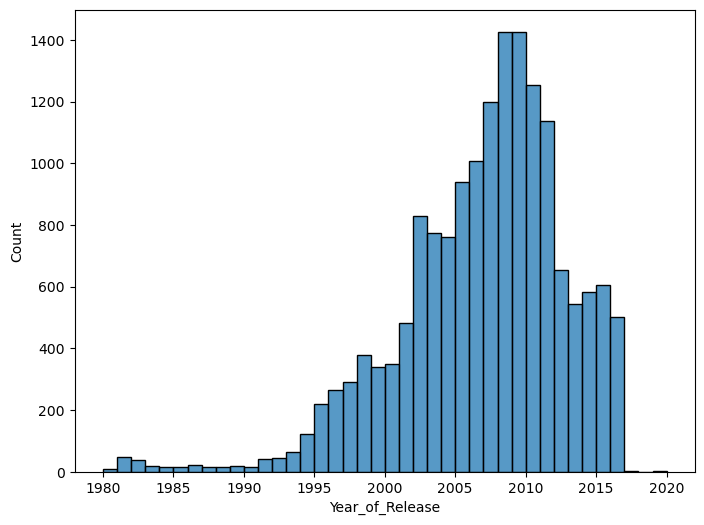

In [32]:
sns.histplot(x=df.Year_of_Release,
             binwidth=1  # ancho de la barra
            );

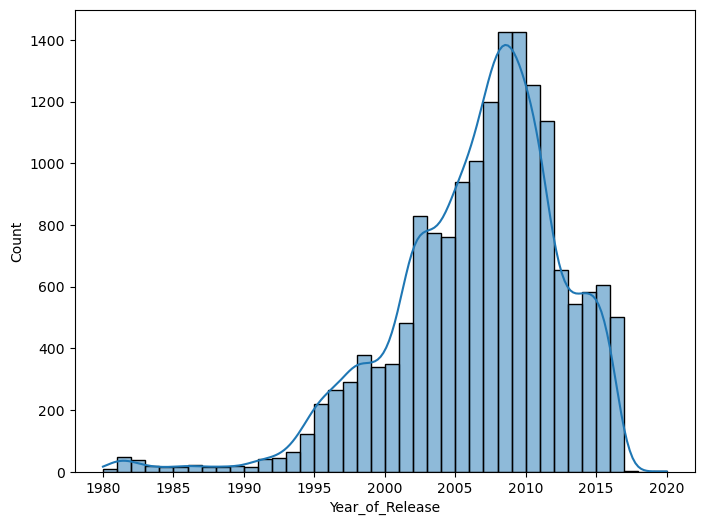

In [33]:
sns.histplot(x=df.Year_of_Release,
             bins=40,     # nº de barras
             kde = True   # kde = kernek debnsity estimator, la linea
            );

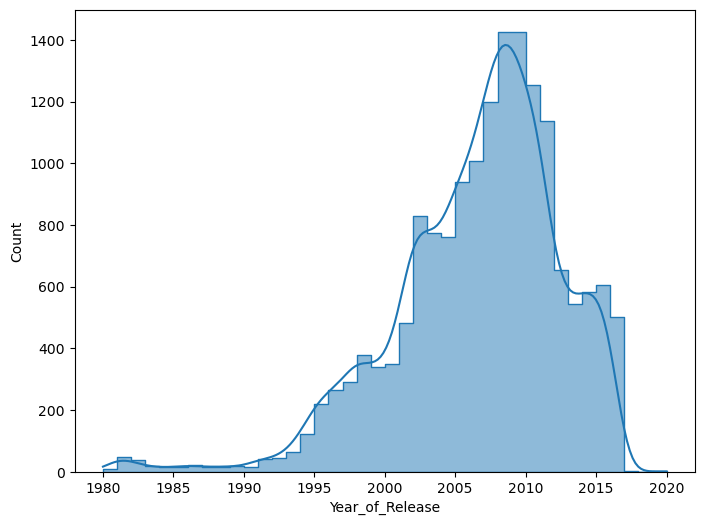

In [34]:
sns.histplot(x=df.Year_of_Release,
             bins=40,          # nº de barras
             kde = True,       # kde = kernek debnsity estimator, la linea
             element='step',   # la linea negra
            );

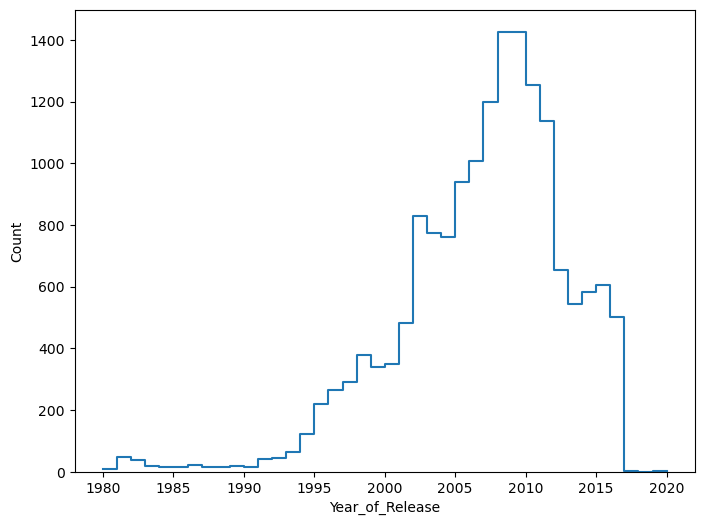

In [36]:
sns.histplot(x=df.Year_of_Release,
             bins=40,          # nº de barras
             #kde = True,       # kde = kernek debnsity estimator, la linea
             element='step',   # la linea negra
             fill=False,       # el relleno
            );

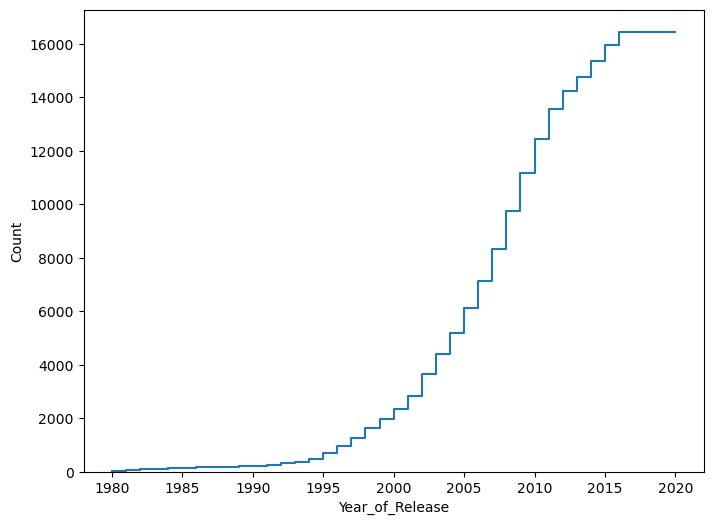

In [37]:
sns.histplot(x=df.Year_of_Release,
             bins=40,          # nº de barras
             #kde = True,       # kde = kernek debnsity estimator, la linea
             element='step',   # la linea negra
             fill=False,       # el relleno
             cumulative=True
            );

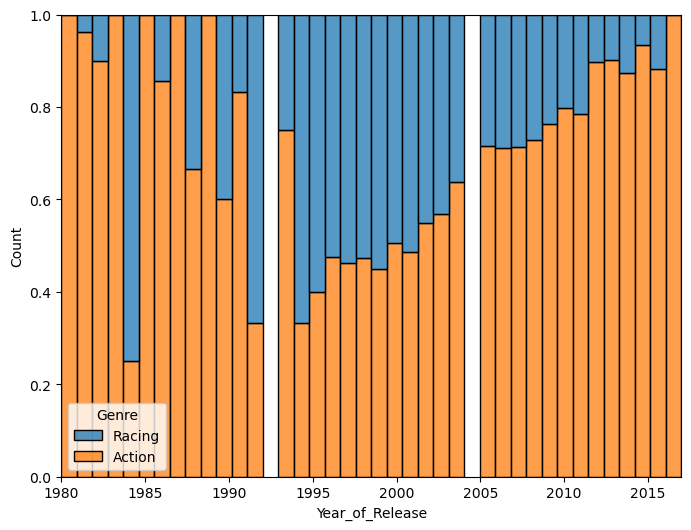

In [44]:
sns.histplot(x=df.Year_of_Release,
             
             hue = df[(df.Genre=='Action') | (df.Genre=='Racing')].Genre,
             
             bins=40,          # nº de barras
             #kde = True,       # kde = kernek debnsity estimator, la linea
             #element='step',   # la linea negra
             #fill=False,       # el relleno
             multiple='fill'   # normaliza, entre 0 y 1
            );

**Scatter Plot**

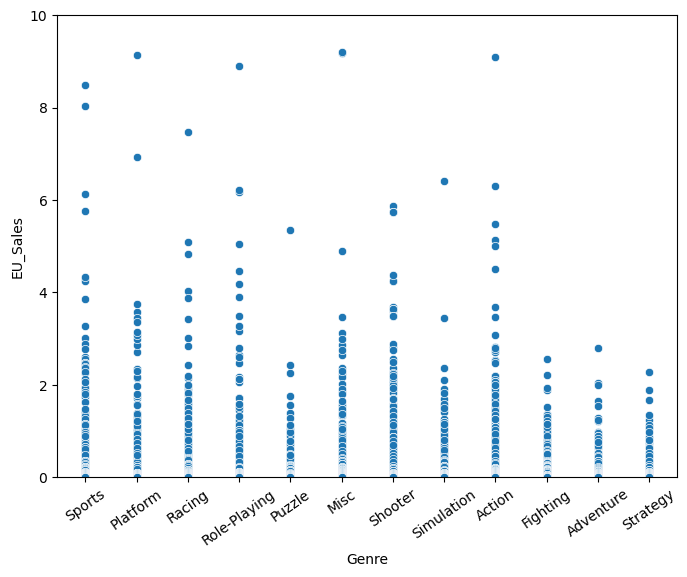

In [48]:
sns.scatterplot(data=df,
               x='Genre',
               y='EU_Sales')

plt.xticks(rotation=35)

plt.ylim(0, 10);

In [49]:
df[(df.Publisher=='Nintendo') & (df.JP_Sales==df.JP_Sales.max())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,NaN,NaN,NaN,NaN,NaN,NaN


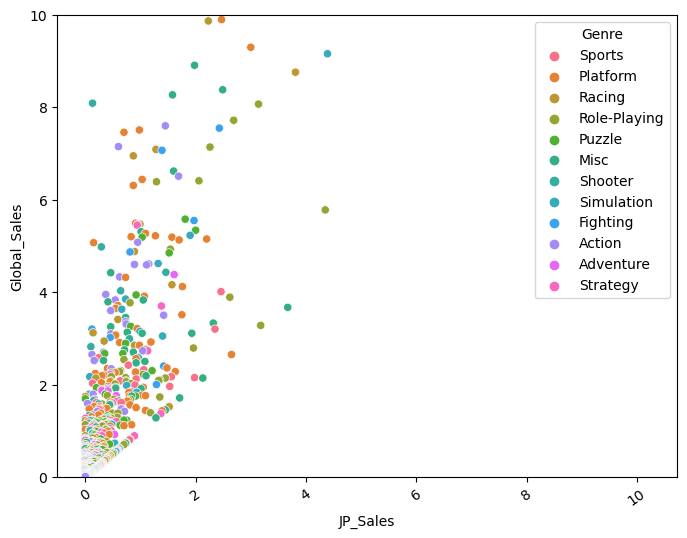

In [52]:
sns.scatterplot(data=df[df.Publisher=='Nintendo'],
                
                hue='Genre',    # es como un ungroupby y el color
                
               x='JP_Sales',
               y='Global_Sales')

plt.xticks(rotation=35)

plt.ylim(0, 10);

**Pie Chart**

In [53]:
df=df.dropna()

tab=pd.crosstab(df.Rating, df.Genre)

tab

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Rating,,,,,,,,,,,,
AO,1,0,0,0,0,0,0,0,0,0,0,0
E,191,49,6,163,240,89,350,73,22,103,754,42
E10+,299,32,14,80,104,24,79,100,34,28,74,62
K-A,0,0,0,1,0,0,0,0,0,0,0,0
M,557,85,45,11,3,0,17,152,523,5,11,24
RP,0,0,0,0,0,0,0,0,0,0,0,1
T,582,82,313,129,56,5,135,387,285,161,104,138


In [55]:
tab.index[:3]

Index(['AO', 'E', 'E10+'], dtype='object', name='Rating')

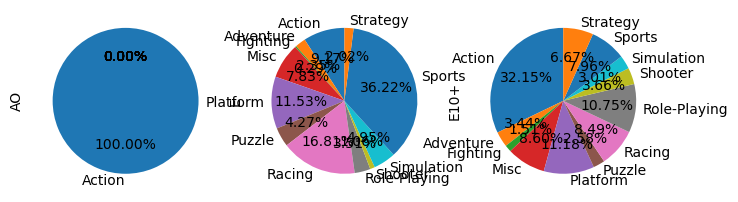

In [61]:
fig, ax = plt.subplots(1, 3)  # pinta 1 fila y 3 columnas de graficos


for i,cat in enumerate(tab.index[:3]):
    
    tab.loc[cat].plot.pie(ax=ax[i],
                          autopct='%1.2f%%',
                          startangle=90
                         )

In [62]:
ax

array([<AxesSubplot: ylabel='AO'>, <AxesSubplot: ylabel='E'>,
       <AxesSubplot: ylabel='E10+'>], dtype=object)

**Boxplot**

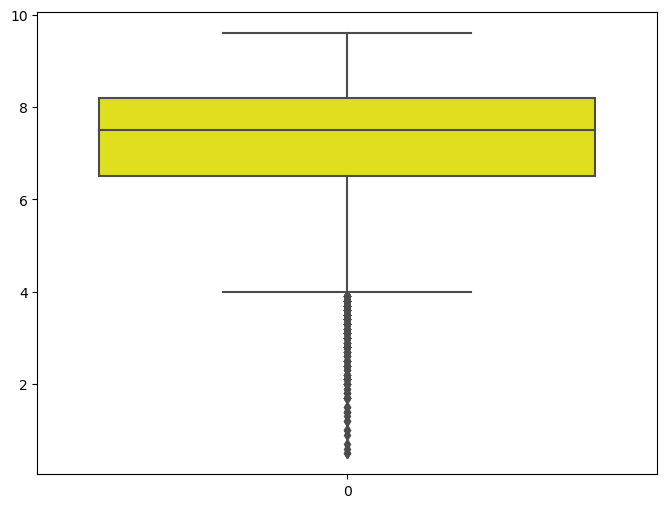

In [66]:
sns.boxplot(data=df.User_Score, color='yellow');

**Violin Plot**

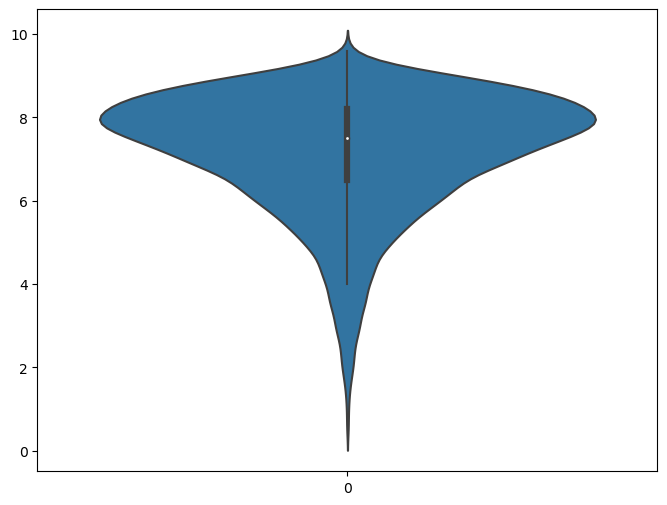

In [73]:
sns.violinplot(data=df.User_Score)

plt.savefig('images/manta_raya.png');

In [74]:
#help(plt.savefig)

**Correlacion**

In [75]:
corr=df.corr(method='pearson')

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_35768/52627476.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method='pearson')


In [76]:
corr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.016239,0.041346,-0.038443,0.042315,0.006661,-0.007661,0.203336,0.199348
NA_Sales,-0.016239,1.000000,0.841808,0.468607,0.726757,0.955793,0.233580,0.283917,0.246208
EU_Sales,0.041346,0.841808,1.000000,0.519929,0.716330,0.939313,0.213102,0.265740,0.283504
JP_Sales,-0.038443,0.468607,0.519929,1.000000,0.394823,0.613546,0.147314,0.168299,0.072773
Other_Sales,0.042315,0.726757,0.716330,0.394823,1.000000,0.804028,0.191509,0.239513,0.240085
Global_Sales,0.006661,0.955793,0.939313,0.613546,0.804028,1.000000,0.237556,0.290397,0.264151
Critic_Score,-0.007661,0.233580,0.213102,0.147314,0.191509,0.237556,1.000000,0.396478,0.265639
Critic_Count,0.203336,0.283917,0.265740,0.168299,0.239513,0.290397,0.396478,1.000000,0.365603
User_Count,0.199348,0.246208,0.283504,0.072773,0.240085,0.264151,0.265639,0.365603,1.000000


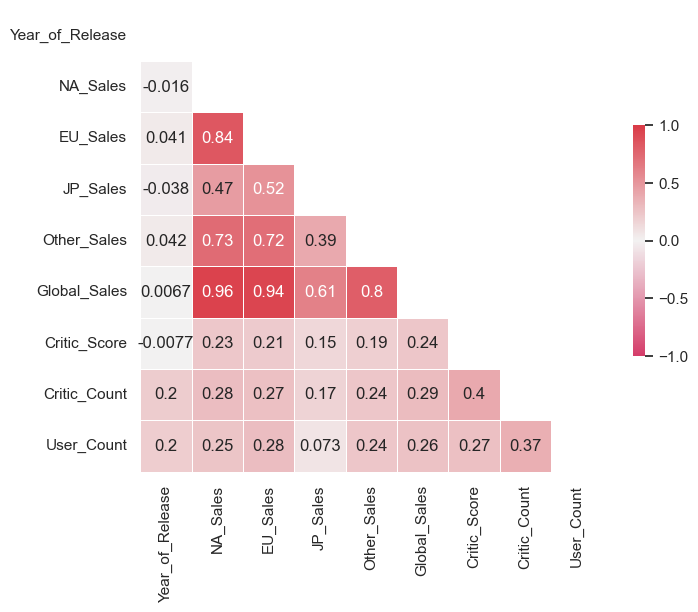

In [86]:
sns.set(style='white')       # estilo blanco

mascara = np.triu(np.ones_like(corr, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores



sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # mapa de color
            
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
            
           );



In [78]:
mascara

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

**Radar chart**

In [110]:
data = df.groupby('Genre').count().T.iloc[0]

etiquetas = list(df.Genre.unique())

len(etiquetas)

12

In [111]:
angulos = np.linspace(0, 2*np.pi, len(etiquetas), endpoint=False)

angulos = np.concatenate((angulos, [angulos[0]]))

data = np.concatenate((data, [data[0]]))

len(data)==len(angulos)

True

In [138]:
data

array([1630,  248,  378,  384,  403,  118,  581,  712,  864,  297,  943,
        267, 1630])

In [142]:
data2 = np.random.random((13,))*1000

data2

array([155.09386853, 555.22044289, 667.4997209 , 385.26736817,
       740.05842412,  70.02215685, 150.92631173, 531.38129442,
       435.33042376, 985.67370343, 313.97704508, 731.74566978,
       158.05421549])

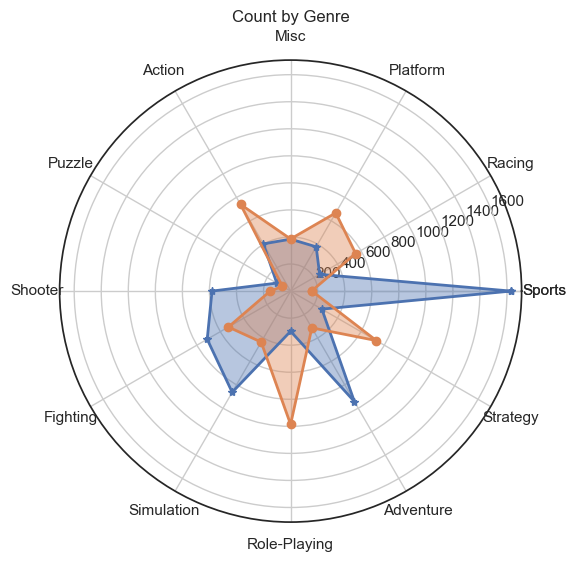

In [147]:
fig = plt.figure()                      # inicia la figura



ax = fig.add_subplot(111, polar=True)    # plot polar



ax.plot(angulos, data, '*-', linewidth=2)   # datos
ax.fill(angulos, data, alpha=0.4)    # rellena de color alpha=0.3 es la transparencia


ax.plot(angulos, data2, 'o-', linewidth=2)   # datos 2
ax.fill(angulos, data2, alpha=0.4)    # rellena de color alpha=0.3 es la transparencia



ax.set_xticklabels([])    # quita los nombres


ax.set_thetagrids(angulos * 180/np.pi, etiquetas+[etiquetas[0]])   # añadir los generos como etiquetas

ax.set_title('Count by Genre')

ax.grid(True)


plt.show();


**Gráficos en 3D**

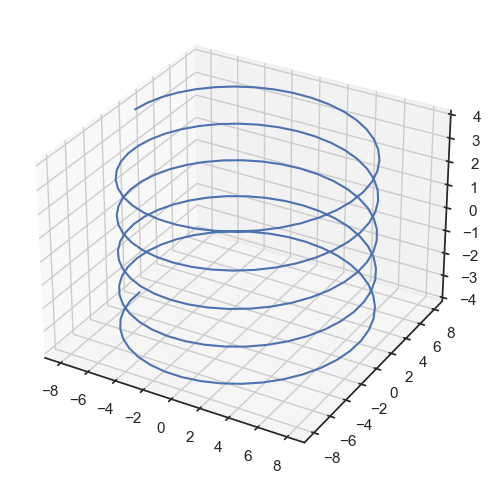

In [151]:
from mpl_toolkits.mplot3d import Axes3D

# voy a pintar una helice DATOS
ang=np.linspace(-5*np.pi, 5*np.pi, 200)


radio = 8


x = radio * np.cos(ang)

y = radio * np.sin(ang)

z = np.linspace(-4, 4, 200)



# GRAFICO

fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')


ax.plot(x, y, z)

plt.show();


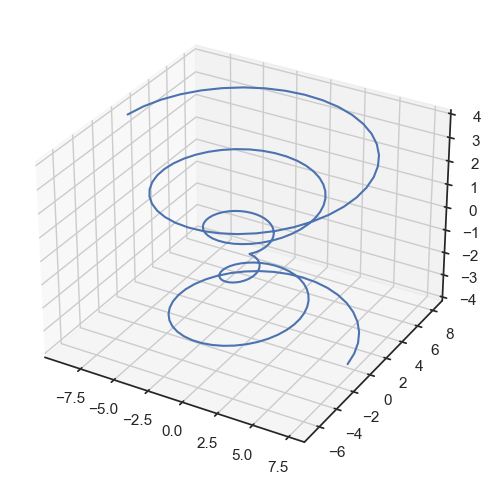

In [152]:
# DIAVOLO

ang=np.linspace(-5*np.pi, 5*np.pi, 200)

z=np.linspace(-4, 4, 200)

r=2*z+1

x=r * np.cos(ang)
y=r * np.sin(ang)


# GRAFICO
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot(x, y, z);

**Line chart**

Normalmente para ver evolutivos.

In [153]:
df=df.groupby('Year_of_Release').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

df.head()

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_35768/3908776010.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby('Year_of_Release').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985.0,0.00,0.03,0.00,0.01,0.03
1988.0,0.00,0.02,0.00,0.01,0.03
1992.0,0.02,0.00,0.00,0.00,0.03
1994.0,0.39,0.26,0.53,0.08,1.27
1996.0,7.91,6.88,4.06,1.24,20.10


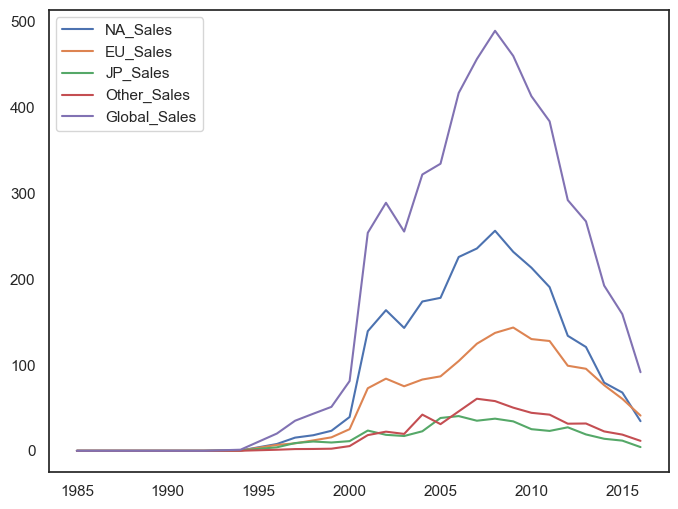

In [157]:
plt.plot(df)


plt.legend(df.columns);

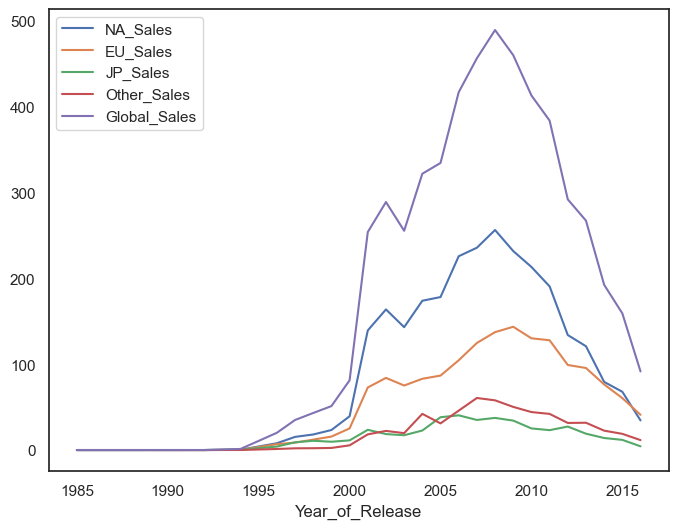

In [158]:
df.plot();

**Bar chart race**

https://pypi.org/project/bar-chart-race/

In [ ]:
%pip install bar-chart-race

In [159]:
import warnings
warnings.filterwarnings('ignore')

import bar_chart_race as bcr

In [160]:
data=bcr.load_dataset('covid19_tutorial')

data

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943
2020-04-06,1632,3335,8926,1810,3739,16523,1874,13341,10783,5385
2020-04-07,2035,3335,10343,2016,3872,17127,2108,14045,12798,6171
2020-04-08,2240,3337,10887,2349,3993,17669,2255,14792,14704,7111
2020-04-09,2523,3339,12228,2607,4110,18279,2403,15447,16553,7993
2020-04-10,3019,3340,13215,2767,4232,18849,2520,16081,18595,8974
2020-04-11,3346,3343,13851,2894,4357,19468,2653,16606,20471,9892


In [161]:
bcr.bar_chart_race(df=data)

In [162]:
bcr.bar_chart_race(df=data, filename='images/covid19.mp4')